In [ ]:
print('hello la team')

hello la team


In [ ]:
pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-vjqr5su3
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-vjqr5su3
  Resolved https://github.com/huggingface/transformers.git to commit 653eb40425344b89b5a24e7b07eb3095b04cdc9d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.45.0.dev0-py3-none-any.whl size=9765289 sha256=7d3d9881308e332b52650c5b0238ad40ab6c418fac632a354584baeff15bd0e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-abhchs2v/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


# Import required Dependencies for a Computer Vision Project

In [ ]:
import zipfile
import os
import glob
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from transformers import ViTFeatureExtractor, ViTForImageClassification
import requests
from transformers import AutoImageProcessor
import pandas as pd
from torch.utils.data import Dataset

In [ ]:
model = "microsoft/swin-tiny-patch4-window7-224" # pre-trained model to use as the base for fine-tuning(swin Transformer)
image_processor  = AutoImageProcessor.from_pretrained(model)
image_processor

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [ ]:
model_checkpoint = "microsoft/swin-tiny-patch4-window7-224" # pre-trained model from which to fine-tune
batch_size = 32 # batch size for training and evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
def unzip_file(zip_path, extract_to):
    """
    Unzip a zip file and maintain its directory structure.

    Args:
    zip_path (str): The path to the zip file.
    extract_to (str): The directory to extract the files into.
    """
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Extrait tous les fichiers dans le répertoire spécifié
        zip_ref.extractall(extract_to)
        print(f"Files extracted to {extract_to}")

# Utiliser la fonction
zip_file_path_train = '/content/drive/MyDrive/oubaid/Financial_Data.zip'
zip_file_path_test = '/content/drive/MyDrive/oubaid/Financial_data_test.zip'

destination_path = '/content/'
unzip_file(zip_file_path_train, destination_path)
unzip_file(zip_file_path_test , destination_path)

Files extracted to /content/
Files extracted to /content/


In [18]:
folder_path_train = '/content/Financial Data'
folder_path_test = '/content/Financial_data_test'
total_images_train = len(glob.glob(os.path.join(folder_path_train, '**/*.[jJ][pP][eE][gG]'), recursive=True))
total_images_test = len(glob.glob(os.path.join(folder_path_test, '**/*.[jJ][pP][eE][gG]'), recursive=True))
print(f"Total number of .jpeg images_train: {total_images_train}")
print(f"Total number of .jpeg images_test: {total_images_test}")

Total number of .jpeg images_train: 47996
Total number of .jpeg images_test: 39996


In [19]:
import os
import pandas as pd

def create_full_img_class_df(base_path):
    """
    Create a DataFrame with image paths and their corresponding labels by traversing the directory structure.

    Args:
    base_path (str): The path to the directory containing subdirectories of images.

    Returns:
    DataFrame: A DataFrame with columns 'img' for image paths and 'label' for their corresponding labels.
    """
    data = pd.DataFrame()
    img_rows = []
    label_rows = []

    # List all subdirectories (each representing a label)
    for label in sorted(os.listdir(base_path)):
        label_path = os.path.join(base_path, label)
        if os.path.isdir(label_path):
            # List all image files in the subdirectory
            for img_file in sorted(os.listdir(label_path)):
                if img_file.endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(label_path, img_file)
                    img_rows.append(img_path)
                    label_rows.append(label)

    data['img'] = img_rows
    data['label'] = label_rows


    return data



# Create the DataFrame
df_train = create_full_img_class_df(folder_path_train)
df_test= create_full_img_class_df(folder_path_test)
X_train,X_val, y_train, y_val = train_test_split(df_train['img'], df_train['label'], test_size = 0.2, stratify = df_train['label'])
# Display the DataFrame
print(X_train.shape[0])
print(X_val.shape[0])
print(df_test.shape[0])



38396
9600
39996


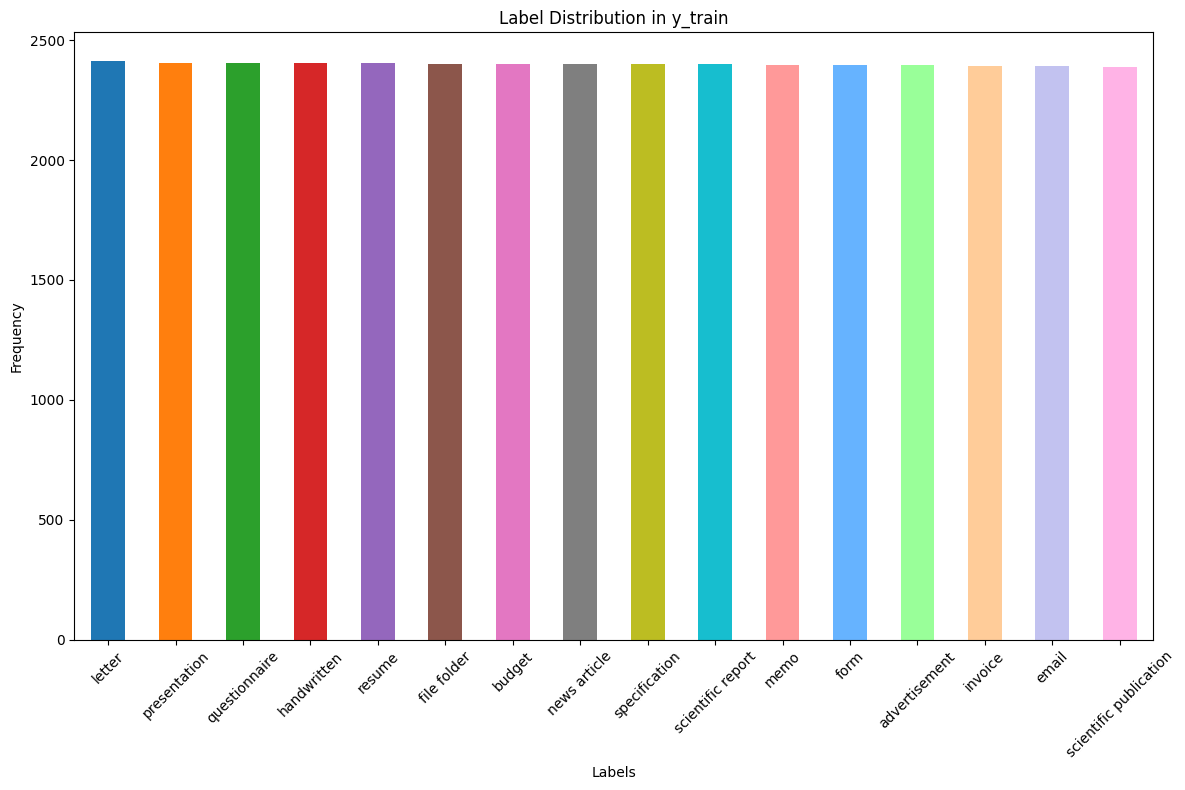

In [20]:
import matplotlib.pyplot as plt

# Count the occurrences of each label in y_train
label_counts = y_train.value_counts()

colors = [
    'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
    'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', '#ff9999', '#66b3ff',
    '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'
]

# Plot the histogram
plt.figure(figsize=(12, 8))
label_counts.plot(kind='bar', color=colors)
plt.title('Label Distribution in y_train')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='', linewidth=0.7)
plt.tight_layout()
plt.show()
#  La proportion d'images est équilibrée, ce qui garantit qu'aucune classe n'est sur-représentée par rapport aux autres

In [21]:
# Initialize variables to track min and max dimensions
min_width, min_height = float('inf'), float('inf')
max_width, max_height = 0, 0

# Iterate over each image path in the DataFrame
for img_path in df_train['img']:
    # Open the image using PIL
    with Image.open(img_path) as img:
        # Get image dimensions
        width, height = img.size

        # Update min and max dimensions
        if width < min_width:
            min_width = width
        if height < min_height:
            min_height = height
        if width > max_width:
            max_width = width
        if height > max_height:
            max_height = height

# Print the results
print(f"Minimum image size: {min_width}x{min_height}")
print(f"Maximum image size: {max_width}x{max_height}")

# La taille des images est différente ; il est nécessaire de standardiser leur taille :)

Minimum image size: 607x1000
Maximum image size: 3235x1000


In [22]:
# Find all unique labels in y_train
unique_labels_train = y_train.unique()

# Create a single mapping dictionary based on the training labels
label2id = {label: i for i, label in enumerate(unique_labels_train)}
# Create the inverse mapping dictionary from id to label
id2label = {i: label for label, i in label2id.items()}


# Convert the labels in y_train and y_val to indices
y_train_mapped = y_train.map(label2id)
y_val_mapped = y_val.map(label2id)

# Print the mapped y_val
print(y_val_mapped)


37161    15
47642     2
40587     9
46703     2
23152     6
         ..
8532     10
35567     8
38574    15
982       4
35119     8
Name: label, Length: 9600, dtype: int64


In [23]:
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)

# Définir les transformations
normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)

# Déterminer les dimensions de recadrage et de redimensionnement
if "height" in image_processor.size:
    size = (image_processor.size["height"], image_processor.size["width"])
    crop_size = size
    max_size = None
elif "shortest_edge" in image_processor.size:
    size = image_processor.size["shortest_edge"]
    crop_size = (size, size)
    max_size = image_processor.size.get("longest_edge")

train_transforms = Compose(
    [
        RandomResizedCrop(crop_size),
        RandomHorizontalFlip(),
        ToTensor(),
        normalize,
    ]
)

val_transforms = Compose(
    [
        Resize(size),
        CenterCrop(crop_size),
        ToTensor(),
        normalize,
    ]
)


In [24]:
class ImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        # Return the total number of images in the dataset
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load the image from the specified path
        image = Image.open(self.image_paths[idx]).convert("RGB")

        # Apply the transformations if they are provided
        if self.transform:
            image = self.transform(image)

        # Get the corresponding label for the image
        label = self.labels[idx]

        # Return the transformed image and its label
        return image, label

# Create the datasets for training and validation
train_dataset = ImageDataset(
    image_paths=X_train.tolist(),  # Convert image paths to a list
    labels=y_train_mapped.tolist(),  # Convert labels to a list
    transform=train_transforms  # Apply training transformations
)

val_dataset = ImageDataset(
    image_paths=X_val.tolist(),  # Convert image paths to a list
    labels=y_val_mapped.tolist(),  # Convert labels to a list
    transform=val_transforms  # Apply validation transformations
)


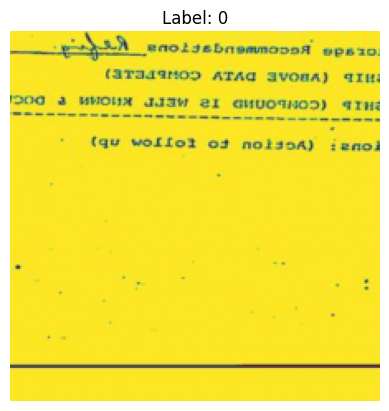

In [25]:
import matplotlib.pyplot as plt

# Get the first image and its label
image, label = train_dataset[0]

# The ToTensor transformation converts the image to a PyTorch Tensor.
# For displaying it with Matplotlib, we need to convert it to a format that Matplotlib understands.
# Denormalize the image for visualization
mean = torch.tensor(image_processor.image_mean).view(3, 1, 1)  # Reshape mean to match the image dimensions
std = torch.tensor(image_processor.image_std).view(3, 1, 1)    # Reshape std to match the image dimensions
image_display = image * std + mean  # Denormalize the image

# Convert the Tensor to HWC format (Height, Width, Channels) for displaying with Matplotlib
plt.imshow(image_display.permute(1, 2, 0).numpy())
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


In [31]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes = True,
)


OSError: Incorrect path_or_model_id: 'SwinForImageClassification(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96, bias=True)
                  (value): Linear(in_features=96, out_features=96, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
                  (dense): Linear(in_features=96, out_features=96, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
              )
              (drop_path): SwinDropPath(p=0.1)
              (layernorm_after): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (intermediate): SwinIntermediate(
                (dense): Linear(in_features=96, out_features=384, bias=True)
                (intermediate_act_fn): GELUActivation()
              )
              (output): SwinOutput(
                (dense): Linear(in_features=384, out_features=96, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
          )
          (downsample): SwinPatchMerging(
            (reduction): Linear(in_features=384, out_features=192, bias=False)
            (norm): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
          )
        )
        (1): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=192, out_features=192, bias=True)
                  (key): Linear(in_features=192, out_features=192, bias=True)
                  (value): Linear(in_features=192, out_features=192, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
                  (dense): Linear(in_features=192, out_features=192, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
              )
              (drop_path): SwinDropPath(p=0.1)
              (layernorm_after): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
              (intermediate): SwinIntermediate(
                (dense): Linear(in_features=192, out_features=768, bias=True)
                (intermediate_act_fn): GELUActivation()
              )
              (output): SwinOutput(
                (dense): Linear(in_features=768, out_features=192, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
          )
          (downsample): SwinPatchMerging(
            (reduction): Linear(in_features=768, out_features=384, bias=False)
            (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          )
        )
        (2): SwinStage(
          (blocks): ModuleList(
            (0-5): 6 x SwinLayer(
              (layernorm_before): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=384, out_features=384, bias=True)
                  (key): Linear(in_features=384, out_features=384, bias=True)
                  (value): Linear(in_features=384, out_features=384, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
                  (dense): Linear(in_features=384, out_features=384, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
              )
              (drop_path): SwinDropPath(p=0.1)
              (layernorm_after): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
              (intermediate): SwinIntermediate(
                (dense): Linear(in_features=384, out_features=1536, bias=True)
                (intermediate_act_fn): GELUActivation()
              )
              (output): SwinOutput(
                (dense): Linear(in_features=1536, out_features=384, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
          )
          (downsample): SwinPatchMerging(
            (reduction): Linear(in_features=1536, out_features=768, bias=False)
            (norm): LayerNorm((1536,), eps=1e-05, elementwise_affine=True)
          )
        )
        (3): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
              )
              (drop_path): SwinDropPath(p=0.1)
              (layernorm_after): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (intermediate): SwinIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
                (intermediate_act_fn): GELUActivation()
              )
              (output): SwinOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
          )
        )
      )
    )
    (layernorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (pooler): AdaptiveAvgPool1d(output_size=1)
  )
  (classifier): Linear(in_features=768, out_features=16, bias=True)
)'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [32]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-eurosat",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=1e-4,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1541: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [33]:
from sklearn.metrics import accuracy_score
import numpy as np

# Define the function to compute metrics
def compute_metrics(eval_pred):
    """Compute accuracy using sklearn's accuracy_score"""
    # Obtain the predictions
    predictions = np.argmax(eval_pred.predictions, axis=1)  # Get the index of the highest predicted value for each example

    # Calculate accuracy
    accuracy = accuracy_score(eval_pred.label_ids, predictions)  # Compare the predicted labels with the true labels to compute accuracy

    # Return the results as a dictionary
    return {"accuracy": accuracy}


In [ ]:
from torch.utils.data import DataLoader
from torch import nn, optim
# Créer les DataLoader pour l'entraînement et la validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
# Définir l'optimiseur
optimizer = optim.Adam(model.parameters(), lr=5e-5)
# Définir la fonction de perte
criterion = nn.CrossEntropyLoss()
num_epochs = 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for epoch in range(num_epochs):
    model.train()  # Mettre le modèle en mode entraînement
    running_loss = 0.0

    for images, labels in train_loader:
        # Déplacer les images et les labels vers le GPU si disponible
        images, labels = images.to(device), labels.to(device)

        # Remise à zéro des gradients
        optimizer.zero_grad()

        # Passe avant (forward pass)
        outputs = model(images).logits
        loss = criterion(outputs, labels)

        # Passe arrière (backward pass) et optimisation
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

    # Phase d'évaluation
    model.eval()  # Mettre le modèle en mode évaluation
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Validation Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch [1/3], Loss: 1.4247405858337878
Validation Accuracy: 68.09%
Epoch [2/3], Loss: 1.1102488010376692
Validation Accuracy: 72.34%
Epoch [3/3], Loss: 0.9882145028064648
Validation Accuracy: 76.24%
Training complete.


In [30]:
from torch.utils.data import DataLoader
from torch import nn, optim
# Créer les DataLoader pour l'entraînement et la validation
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
# Définir l'optimiseur
optimizer = optim.Adam(model.parameters(), lr=5e-5)
# Définir la fonction de perte
criterion = nn.CrossEntropyLoss()
num_epochs = 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model to the correct device
model = model.to(device)

for epoch in range(num_epochs):
    model.train()  # Mettre le modèle en mode entraînement
    running_loss = 0.0

    for images, labels in train_loader:
        # Déplacer les images et les labels vers le GPU si disponible
        images, labels = images.to(device), labels.to(device)

        # Remise à zéro des gradients
        optimizer.zero_grad()

        # Passe avant (forward pass)
        outputs = model(images).logits
        loss = criterion(outputs, labels)

        # Passe arrière (backward pass) et optimisation
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

    # Phase d'évaluation
    model.eval()  # Mettre le modèle en mode évaluation
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Validation Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch [1/3], Loss: 1.459478047390779
Validation Accuracy: 66.79%
Epoch [2/3], Loss: 1.1311983434359232


KeyboardInterrupt: 

In [34]:
from torch.utils.data import DataLoader
from torch import nn, optim
# Créer les DataLoader pour l'entraînement et la validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
# Définir l'optimiseur
optimizer = optim.Adam(model.parameters(), lr=5e-5)
# Définir la fonction de perte
criterion = nn.CrossEntropyLoss()
num_epochs = 7
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model to the correct device
model = model.to(device)

for epoch in range(num_epochs):
    model.train()  # Mettre le modèle en mode entraînement
    running_loss = 0.0

    for images, labels in train_loader:
        # Déplacer les images et les labels vers le GPU si disponible
        images, labels = images.to(device), labels.to(device)

        # Remise à zéro des gradients
        optimizer.zero_grad()

        # Passe avant (forward pass)
        outputs = model(images).logits
        loss = criterion(outputs, labels)

        # Passe arrière (backward pass) et optimisation
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

    # Phase d'évaluation
    model.eval()  # Mettre le modèle en mode évaluation
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Validation Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch [1/7], Loss: 1.0501395162691674
Validation Accuracy: 75.64%
Epoch [2/7], Loss: 0.9525781315316757
Validation Accuracy: 77.92%
Epoch [3/7], Loss: 0.8931494038800398
Validation Accuracy: 79.18%
Epoch [4/7], Loss: 0.8367990428954363
Validation Accuracy: 80.45%
Epoch [5/7], Loss: 0.795922062471509
Validation Accuracy: 79.90%
Epoch [6/7], Loss: 0.75796458500127
Validation Accuracy: 80.67%
Epoch [7/7], Loss: 0.7284386383742094
Validation Accuracy: 81.46%
Training complete.


In [ ]:
from torch.utils.data import DataLoader
from torch import nn, optim
# Créer les DataLoader pour l'entraînement et la validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
# Définir l'optimiseur
optimizer = optim.Adam(model.parameters(), lr=1e-4)
# Définir la fonction de perte
criterion = nn.CrossEntropyLoss()
num_epochs = 7
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model to the correct device
model = model.to(device)

for epoch in range(num_epochs):
    model.train()  # Mettre le modèle en mode entraînement
    running_loss = 0.0

    for images, labels in train_loader:
        # Déplacer les images et les labels vers le GPU si disponible
        images, labels = images.to(device), labels.to(device)

        # Remise à zéro des gradients
        optimizer.zero_grad()

        # Passe avant (forward pass)
        outputs = model(images).logits
        loss = criterion(outputs, labels)

        # Passe arrière (backward pass) et optimisation
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

    # Phase d'évaluation
    model.eval()  # Mettre le modèle en mode évaluation
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Validation Accuracy: {accuracy:.2f}%")

print("Training complete.")